# **Statistics with Python**


-   Regression analysis in place of the t-test
-   Regression analysis in place of ANOVA
-   Regression analysis in place of correlation


In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import seaborn as sns

In [19]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [25]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var', 'count']}).reset_index()

gender    beauty                         
               mean      std       var count
0  female  0.116109  0.81781  0.668813   195
1    male -0.084482  0.75713  0.573246   268

### Average Age

In [26]:
ratings_df['age'].mean()

48.365010799136066

In [27]:
ratings_df['age'].std()

9.80274203786482

In [28]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [29]:
no_duplicates_ratings_df['age'].mean()

47.5531914893617

In [30]:
no_duplicates_ratings_df['age'].std()

10.25651329515495

For the calculation of mean age, we have to remove duplicates!

## Data Visualization

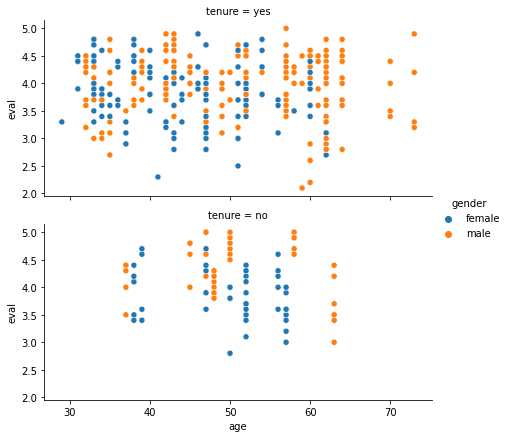

In [31]:
sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

In [32]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

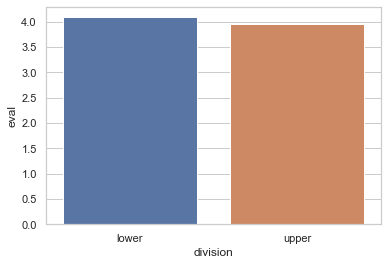

In [33]:
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)

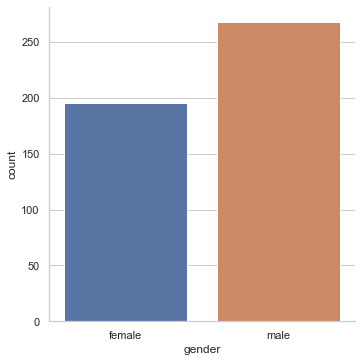

In [34]:
sns.catplot(x='gender', kind='count', data=ratings_df)

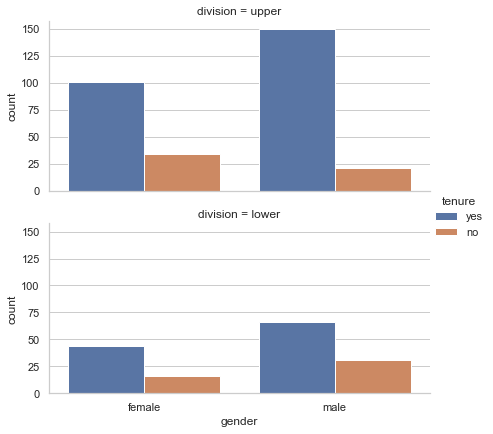

In [35]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)


# Probability Distribution

#### Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5


In [36]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


In [37]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


#### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2

In [38]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


In [39]:
x2 = 4.2
prob2 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob2)

0.642057540461896


In [40]:
round((prob2 - prob1)*100, 1)

45.7

In [42]:
## because it is a two-tailed test we multiply by 2
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/np.sqrt(36))), 3)

0.156

Conclusion: Because the p-value is greater than 0.05, we fail to reject the null hypothesis as there is no sufficient evidence to prove that the mean point of the regional players is different from the historic mean

# Levene's Test 

In [43]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

In [44]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

# Chi Square

#### Using the teachers' rating data set, is there an association between tenure and gender?

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [52]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [53]:
scipy.stats.chi2_contingency(cont_table, correction = True)

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.

# Pearson for Correlation

Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score

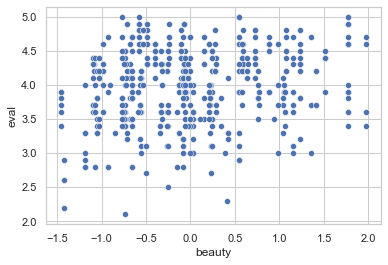

In [54]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [56]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.1890390908404521, 4.247115419812614e-05)

# Regression Analysis

### Regression with T-test: Using the teachers rating data set, does gender affect teaching evaluation rates?

We will state the null hypothesis:

-   $H_0: β1$ = 0 (Gender has no effect on teaching evaluation scores)
-   $H_1: β1$ is not equal to 0 (Gender has an effect on teaching evaluation scores)

### T Test

In [5]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

### Regression

Initially, we had used the t-test to test if there was a statistical difference in evaluations for males and females, we are now going to use regression. 


We will use the female variable. female = 1 and male = 0


In [6]:
## X is the input variables (or independent variables)
X = ratings_df['female']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00124
Time:                        16:51:43   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient -0.1680 means that females get 0.168 scores less than men.


### Regression with ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


State the Hypothesis:

-   $H_0: µ1 = µ2 = µ3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Then we group the data like we did with ANOVA


In [46]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

### ANOVA

In [47]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

In [49]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.


In [51]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Regression

In [11]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


**Conclusion:** We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.


### Regression with ANOVA option 2


Create dummy variables - A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. Dummy variables are dichotomous, i.e they can take on only two quantitative values.


In [12]:
X = pd.get_dummies(ratings_df[['age_group']])

In [13]:
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           4.32e-08
Time:                        16:55:30   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0138      0.028      0.496      0.620      -0.041       0.069
age_group_40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
age_group_57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
age_group_between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     5.90e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You will get the same results and conclusion


### Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?


In [14]:
## X is the input variables (or independent variables)
X = ratings_df['beauty']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           4.25e-05
Time:                        16:56:06   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between beauty and evaluation scores


### Question 1: Using the teachers' rating data set, does tenure affect beauty scores?

Null Hypothesis: Mean beauty scores for tenured and non-tenured instructors are equal

In [16]:
X = ratings_df['tenured_prof']
Y = ratings_df['beauty']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.866
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00525
Time:                        16:58:59   Log-Likelihood:                -379.83
No. Observations:                 463   AIC:                             763.7
Df Residuals:                     461   BIC:                             771.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1333      0.055     75.791      0.000       4.026       4.241
tenured_prof    -0.1732      0.062     -2.805      0.005      -0.295      -0.052
==============================================================================
Omnibus:                       17.543   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.842
Skew:                          -0.484   Prob(JB):                     8.10e-05
Kurtosis:                       2.803   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is greater than 0.05, so we fail to reject the null hypothesis as there is no evidence that the mean difference of tenured and untenured instructors are different

### Question 2: Using the teachers' rating data set, does being an English speaker affect the number of students assigned to professors?

Null Hypothesis: Mean number of students assigned to native English speakers vs non-native English speakers are equal


In [17]:
X = ratings_df['English_speaker']
Y = ratings_df['allstudents']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.410
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00229
Time:                        17:00:19   Log-Likelihood:                -379.07
No. Observations:                 463   AIC:                             762.1
Df Residuals:                     461   BIC:                             770.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6893      0.104     35.502      0.000       3.485       3.893
English_speaker     0.3289      0.107      3.068      0.002       0.118       0.540
==============================================================================
Omnibus:                       17.875   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.248
Skew:                          -0.499   Prob(JB):                     6.61e-05
Kurtosis:                       2.992   Cond. No.                         8.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we reject the null hypothesis as there is evidence that there is a significant difference of mean number of students assigned to native English speakers vs non-native English speakers.


### Question 3: Using the teachers' rating data set, what is the correlation between the number of students who participated in the evaluation survey and evaluation scores?

In [18]:
X = ratings_df['students']
y = ratings_df['eval']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5806
Date:                Mon, 23 Nov 2020   Prob (F-statistic):              0.446
Time:                        17:03:09   Log-Likelihood:                -383.46
No. Observations:                 463   AIC:                             770.9
Df Residuals:                     461   BIC:                             779.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9823      0.033    119.689      0.000       3.917       4.048
students       0.0004      0.001      0.762      0.446      -0.001       0.002
==============================================================================
Omnibus:                       15.259   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.283
Skew:                          -0.456   Prob(JB):                     0.000291
Kurtosis:                       2.888   Cond. No.                         74.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is 0.001, R will be √0.001, correlation coefficient is 0.03 (close to 0). There is a very weak correlation between the number of students who participated in the evaluation survey and evaluation scores

